In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import pprint 
from pygeocoder import Geocoder

In [2]:
#https://www.kaggle.com/aakashnain/eda-nytaxi
train=pd.read_csv('train/train.csv')
test=pd.read_csv('test/test.csv')

In [3]:
train.info()        # No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
print('Total number of training samples are : ', train.shape[0])
print('Total number of testing samples are : ', test.shape[0])

Total number of training samples are :  1458644
Total number of testing samples are :  625134


In [5]:
train.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [6]:
nameofdays={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [7]:
'''Perform Feature Engineering'''
#train['pickup_datetime']=train['pickup_datetime'].apply(lambda x:pd.to_datetime(x))

train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'])     #This approach is very fast as compared to the above one
train['dropoff_datetime']=pd.to_datetime(train['dropoff_datetime'])     

train['Hour']=train.pickup_datetime.dt.hour
train['Month']=train.pickup_datetime.dt.month
train['Day']=train.pickup_datetime.dt.dayofweek
train['DayName']=train.Day.map(nameofdays)

  # Lets Start with EDA

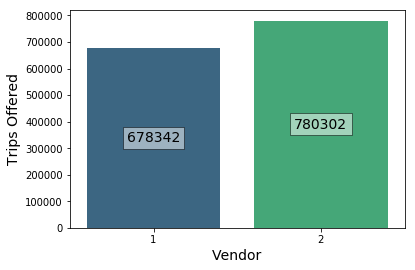

In [8]:
                    '''Vendor 2 have more number of trips'''

ax=plt.figure()
ax=sns.countplot(x='vendor_id',data=train,palette='viridis')
plt.ylabel('Trips Offered',fontsize=14)
plt.xlabel('Vendor',fontsize=14)
for i in ax.patches:
    x,y=i.xy
    w=i.get_width()
    h=i.get_height()
    plt.text(x=x+w/2,y=h.max()*1/2,s=h,fontsize=14,horizontalalignment='center',
             verticalalignment='center',bbox=dict(facecolor='w', alpha=0.5))
    


In [9]:

print('Total Percentage of Vendor=1 is {:0f}%'.format((train[train['vendor_id']==1].vendor_id.count()/train.vendor_id.count())*100))
print('Total Percentage of Vendor=2 is {:0f}%'.format((train[train['vendor_id']==2].vendor_id.count()/train.vendor_id.count())*100))

Total Percentage of Vendor=1 is 46.504973%
Total Percentage of Vendor=2 is 53.495027%


In [10]:
 '''We now got the Month,Day, Hour from the PickUp DateTime Column to check if there are any seasonality'''
    
    
train.head(2) 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,3,0,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6,Sunday


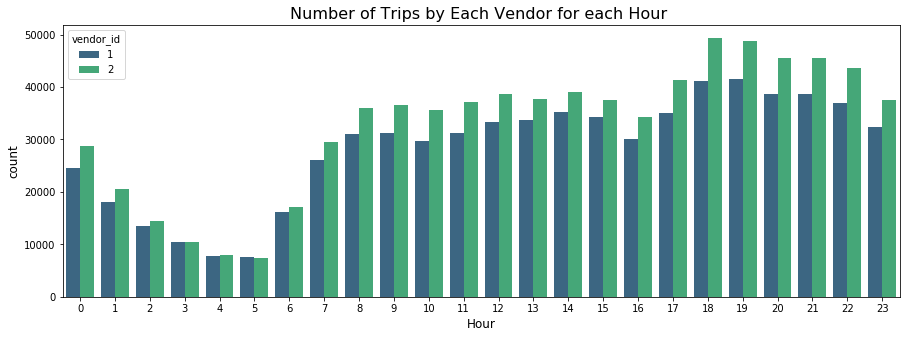

In [11]:
                    '''Check the number of rides for each vendors each hour'''


plt.figure(figsize=(15,5))
plt.ylabel('Number of Trips',fontsize=12)
plt.xlabel('Hours',fontsize=12)
plt.title('Number of Trips by Each Vendor for each Hour ',fontsize=16)
sns.countplot(x='Hour',data=train,palette='viridis',hue='vendor_id')

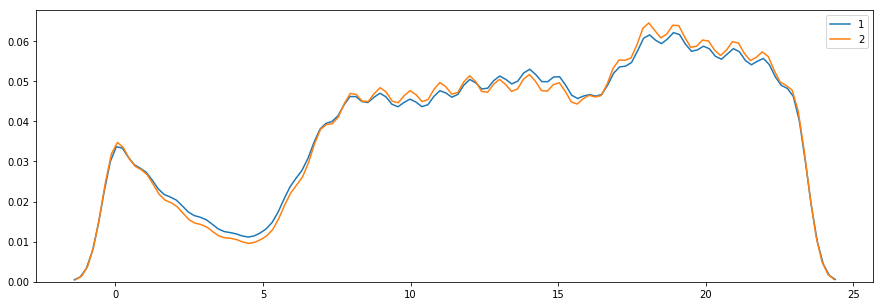

In [12]:
                    '''KDE Plot for both the vendors is visualized.It is similar'''

plt.figure(figsize=(15,5))
ax=sns.kdeplot(train[train['vendor_id']==1]['Hour'],label='1')
ax=sns.kdeplot(train[train['vendor_id']==2]['Hour'],label='2')

Text(0.5,0,'Day')

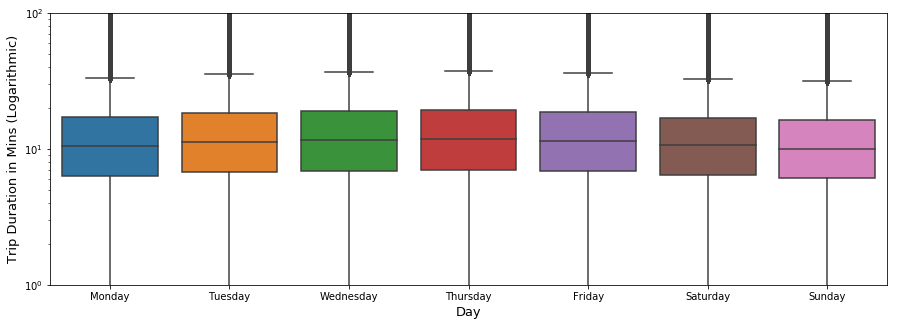

In [13]:
                    '''Box Plot. '''

ax=plt.figure(figsize=(15,5))
bo=train.trip_duration/60

ax=sns.boxplot(x='DayName',y=bo,data=train,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) 

plt.yscale('log')
plt.ylim([1,100])

plt.ylabel('Trip Duration in Mins (Logarithmic)',fontsize=13)
plt.xlabel('Day',fontsize=13)



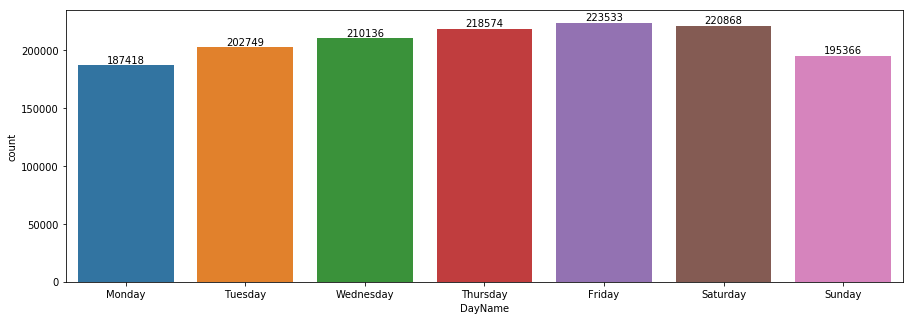

In [14]:
ax=plt.figure(figsize=(15,5))
plt.tight_layout()
ax=sns.countplot(x='DayName',data=train,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
for i in ax.patches:
    x,y=i.xy
    w=i.get_width()
    h=i.get_height()
    plt.text(x=x+w/2,y=h*1.022,s=h,horizontalalignment='center',verticalalignment='center')

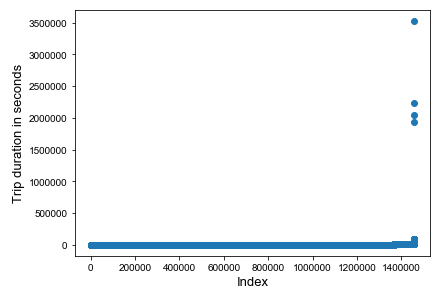

In [15]:
'''Lets check for any outlier with trip duration '''



plt.figure(figsize=(6,4))
plt.scatter(x=train.trip_duration.index,y=train.trip_duration.sort_values(),data=train)
#plt.scatter(x=range(len(train.trip_duration)),y=train.trip_duration.sort_values())      OTHER WAY OF SOLVING
plt.tight_layout()
plt.xlabel('Index',fontsize=13)
plt.ylabel('Trip duration in seconds',fontsize=13)
#plt.ylim([0,50000])
ax=sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8})

Most of the Trips had a Trip Duration From Range 2.47355265170961 to 49.68263311736214


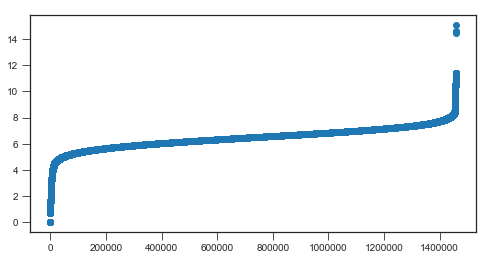

In [16]:
'''Log Plot to see if there are any further outliers since the range/variance was a lot in the previous visualization'''
plt.figure(figsize=(8,4))
plt.tight_layout()
plt.scatter(x=train['trip_duration'].index,y=np.log(train['trip_duration'].sort_values()))
print('Most of the Trips had a Trip Duration From Range ' + str(np.exp(5)/60) + ' to ' + str(np.exp(8)/60))  

Main Focus will be on values from 5-8 but will also consider 2,3,4 when the distance is almost 0 and consider 9 when distance is a lot or it is peak hour.

Text(0.5,1,'Dropoff Longitude')

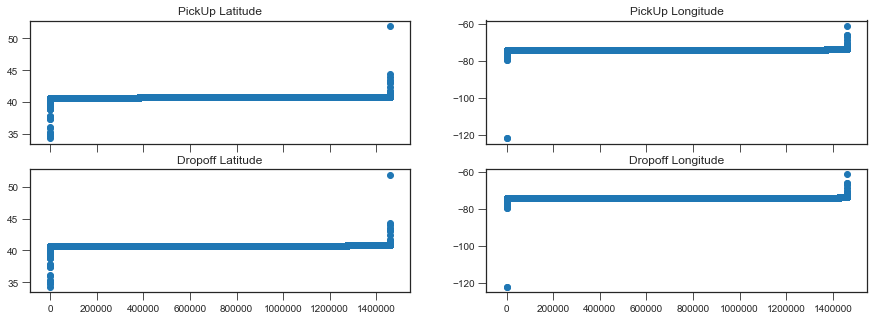

In [17]:
                    '''Check The Latitude and Longitude of all the Trips'''

fig,ax=plt.subplots(2,2,sharex=True,figsize=(15,5))


ax[0,0].scatter(x=range(len(train.pickup_latitude)),y=train.pickup_latitude.sort_values(),data=train)
ax[0,1].scatter(x=range(len(train.pickup_longitude)),y=train.pickup_longitude.sort_values(),data=train)
ax[1,0].scatter(x=range(len(train.dropoff_latitude)),y=train.pickup_latitude.sort_values(),data=train)
ax[1,1].scatter(x=range(len(train.dropoff_longitude)),y=train.pickup_longitude.sort_values(),data=train)
ax[0,0].set_title('PickUp Latitude')
ax[0,1].set_title('PickUp Longitude')
ax[1,0].set_title('Dropoff Latitude')
ax[1,1].set_title('Dropoff Longitude')              #Change the position of the title if possible?????

There are few outliers as we see in the above plot.We will only consider New York. So drop all the other Latitudes and Longitudes. 

In [18]:
                    '''There are Trip Duration with Large Numbers'''
train.sort_values('trip_duration',ascending=False).head(5)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,22,2,5,Saturday
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,6,1,1,Tuesday
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,22,2,5,Saturday
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,0,1,1,Tuesday
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,23,2,0,Monday


We will calculate the Distance. Then we will see if there are any correlation of such trips with Distance traveeled.


# Next we calculate the distance based on Latitude and Longitude

In [19]:
from math import sin, cos, sqrt, atan2, radians

In [20]:
                    '''Method 1 -> Calculate the Distance'''
def dist(x):
    R = 6373.0
    
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = radians(x[2])
    lon2 = radians(x[3])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    distance_mile=distance/1.60934
    return distance_mile


In [21]:
df=train[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]
train['Distance']=df.apply(dist,axis=1)

In [22]:
train.sort_values('Distance').head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
466799,id2551005,2,2016-05-14 22:13:52,2016-05-14 22:17:31,1,-73.982330,40.742901,-73.982330,40.742901,N,219,22,5,5,Saturday,0.0
212128,id1600053,2,2016-02-23 05:28:43,2016-02-23 05:31:44,4,-73.978851,40.728119,-73.978851,40.728119,N,181,5,2,1,Tuesday,0.0
821598,id0401568,2,2016-01-19 13:03:27,2016-01-19 13:13:19,1,-73.951279,40.770721,-73.951279,40.770721,N,592,13,1,1,Tuesday,0.0
271721,id0953607,2,2016-04-30 20:58:22,2016-04-30 21:03:09,1,-73.998550,40.757561,-73.998550,40.757561,N,287,20,4,5,Saturday,0.0
1411622,id0487060,1,2016-02-25 19:36:53,2016-02-25 19:37:36,1,-74.040390,40.736027,-74.040390,40.736027,N,43,19,2,3,Thursday,0.0


The Distance is 0 in some cases.It can be the ride is from A to B and again come back to A making the distance to be 0.
But we will not eliminate records where distance=0 and trip duration is less than 120 secs assuming the ride was cancelled and the driver was waitng for the passenger.
(Will also check how many such records are if there are many then will have to find an alternate way to solve this problem)

In [23]:
                    ''' Method 2 -> The Other way of calculating the Distance using the Python Library'''

from geopy.distance import geodesic

A=(40.758633,-73.972366)
B=(43.674000,-79.553535)
print(round(geodesic(A,B).miles))
print(round(dist([40.758633,-73.972366,43.674000,-79.553535])))
'''Compring the values between Method 1 and Method 2 '''

350
349


'Compring the values between Method 1 and Method 2 '

In [24]:
                    '''Lets see if there is a correlation between Distance and Trip Duration'''
    
train.sort_values(by='trip_duration',ascending=False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,22,2,5,Saturday,12.369610
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,6,1,1,Tuesday,1.016343
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,22,2,5,Saturday,3.718521
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,0,1,1,Tuesday,12.523761
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,23,2,0,Monday,12.830852


So just for 12 miles of distance the trip is taking approximately 979 Hours (1st Row).So this is definitely an outlier/noise.Similarly we can observe many such records.We will drop such records when training our model.

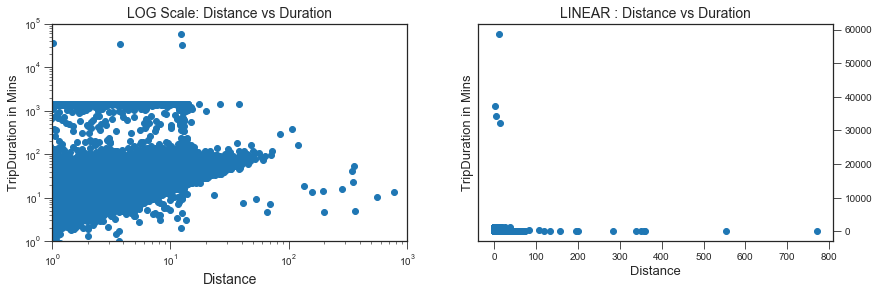

In [25]:
'''Lets check it by plotting a graph'''

fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.scatter(x='Distance',y=train.trip_duration/60,data=train)
ax1.set_title('LOG Scale: Distance vs Duration',fontsize=14)
ax1.set_xlabel('Distance',fontsize=14)
ax1.set_ylabel('TripDuration in Mins',fontsize=13)
ax1.set_xscale('Log')
ax1.set_xlim([1,1000])
ax1.set_yscale('Log')
ax1.set_ylim([1,100000])

ax2.scatter(x='Distance',y=train.trip_duration/60,data=train)
ax2.set_title('LINEAR : Distance vs Duration',fontsize=14)
ax2.set_xlabel('Distance',fontsize=13)
ax2.set_ylabel('TripDuration in Mins',fontsize=13)
ax2.yaxis.set_ticks_position('right')




We observe that there are few outliers.There are few data points where the Distance is > 100 miles but the duration is less than a minute and vice versa as well. So when we train our model we will get rid of such data points. 

Text(0,0.5,'Log [Duration] in Mins ')

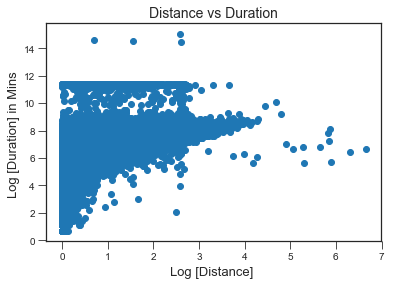

In [26]:
                '''The above 2 Plots are the actual values.Just the y-axis scale is different.This plot we have log values '''

plt.scatter(x=np.log(train['Distance']+1),y=np.log(train['trip_duration']+1),data=train)
plt.title('Distance vs Duration',fontsize=14)
plt.xlabel('Log [Distance] ',fontsize=13)
plt.ylabel('Log [Duration] in Mins ',fontsize=13)

It was showing us negative values because we had 0 as the distance so we add +1 to avoid getting negative values.Also see how different x-axis any y-axis are called in this and previous plot

# Fetch city name from the Latitude and Longitude columns.Just to Learn.

In [27]:
import reverse_geocoder as rg    #Fetch City Name from the Longitude and Latitude


def getloc(x):
    s=(x[0],x[1])
    d=(x[2],x[3])
    source=rg.search(s)
    destination=rg.search(d)
    for i,j in zip(source,destination):
        source_loc=list(i.values())[2]
        destination_loc=list(j.values())[2]
        return pd.Series([source_loc,destination_loc])       #When returning more than 1 value 
    

In [28]:
df_cityname=df.copy().head(10)
df_cityname[['source','destination']]=df_cityname.apply(getloc,axis=1)

Loading formatted geocoded file...


In [29]:
df_cityname

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,source,destination
0,40.767937,-73.982155,40.765602,-73.964630,Manhattan,Manhattan
1,40.738564,-73.980415,40.731152,-73.999481,Long Island City,New York City
2,40.763939,-73.979027,40.710087,-74.005333,Manhattan,New York City
3,40.719971,-74.010040,40.706718,-74.012268,New York City,New York City
4,40.793209,-73.973053,40.782520,-73.972923,Manhattan,Manhattan
5,40.742195,-73.982857,40.749184,-73.992081,Long Island City,Weehawken
6,40.757839,-73.969017,40.765896,-73.957405,Long Island City,Manhattan
7,40.797779,-73.969276,40.760559,-73.922470,Manhattan,Long Island City
8,40.738400,-73.999481,40.732815,-73.985786,New York City,New York City
9,40.744339,-73.981049,40.789989,-73.973000,Long Island City,Manhattan


Not an accurate technique

rg.search returns an Ordered Dictionary and we have to fetch values in a different way.
How to fetch value from Ordered Dictionary.  
Will show an example*

    

In [30]:
                    '''Fetching Data from Ordered Dictionary '''

a=rg.search((40.749851, -73.990723))
for i in a:
    #print(i)            #This is an Ordered Dictionary
    values=i.values()
    keys=i.keys()
print(list(values)) #This will be a List.So after it is a list we can fetch in a similar way as we used to do-> list(values)[2]
print(list(keys))



print(list(values)[2])
#Other Technique where you are specific to fetch a value based on the keys
for x,y in zip(keys,values):
        if x=='name':
            print(y)

['40.76955', '-74.02042', 'Weehawken', 'New Jersey', 'Hudson County', 'US']
['lat', 'lon', 'name', 'admin1', 'admin2', 'cc']
Weehawken
Weehawken


# Remove Records which are outliers and only consider records for NYC             Performing Feature Engineering

In [31]:
train.sort_values('Distance').head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
466799,id2551005,2,2016-05-14 22:13:52,2016-05-14 22:17:31,1,-73.982330,40.742901,-73.982330,40.742901,N,219,22,5,5,Saturday,0.0
212128,id1600053,2,2016-02-23 05:28:43,2016-02-23 05:31:44,4,-73.978851,40.728119,-73.978851,40.728119,N,181,5,2,1,Tuesday,0.0


In [32]:
                                    #Step 1: Specify Latitude and Longitude Range 
    
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

In [33]:
                           #Step 2 :Remove values with 0 distance and trip duration greater than 120 secs.

train.drop(labels=train[(train['Distance']==0) & (train.trip_duration>120)].index,inplace=True)


In [34]:
                        #Step 3 : Remove records that are taking more than 5 Hours i.e 20000 seconds
train.drop(train[np.log(train['trip_duration'])>10].index,inplace=True)

In [35]:
                        #Step 4 :Remove records based on the miles covered and time taken

'''Can also go a bit in detail'''

train.drop(train[(train['Distance']<3) & (train['trip_duration']>4500)].index,inplace=True)  #*****
train.drop(train[(train['Distance']<5) & (train['trip_duration']>6000)].index,inplace=True)
train.drop(train[(train['Distance']<11) & (train['trip_duration']>8000)].index,inplace=True)
train.drop(train[(train['Distance']<18) & (train['trip_duration']>8200)].index,inplace=True)



Similarly we can do for larger miles and lesser duration

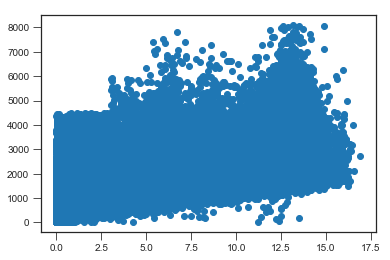

In [36]:
'''Check how the distribution is after eliminating few outliers'''
plt.scatter(y='trip_duration',x='Distance',data=train)



In [37]:
train[train['Distance']<1].sort_values('trip_duration',ascending=False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
633226,id3108582,2,2016-03-04 19:04:32,2016-03-04 20:19:32,2,-73.989143,40.743320,-73.976807,40.736050,N,4500,19,3,4,Friday,0.818474
793078,id0265694,2,2016-03-18 07:07:41,2016-03-18 08:21:52,1,-73.862778,40.768570,-73.862152,40.768700,N,4451,7,3,4,Friday,0.033952
1450818,id1007729,2,2016-01-15 15:40:41,2016-01-15 16:54:47,1,-73.781616,40.644821,-73.782623,40.646809,N,4446,15,1,4,Friday,0.147166
113098,id1987452,1,2016-04-30 15:09:04,2016-04-30 16:23:09,2,-73.788445,40.647228,-73.794510,40.657413,N,4445,15,4,5,Saturday,0.772467
440689,id0469564,1,2016-03-10 14:48:11,2016-03-10 16:02:01,1,-73.997147,40.751247,-73.983238,40.750454,N,4430,14,3,3,Thursday,0.730285


# Try to plot by using different maps capability

Simple Scatter plot 

'There are more Drop offs to Brooklyn and Queens as compared to its pickup '

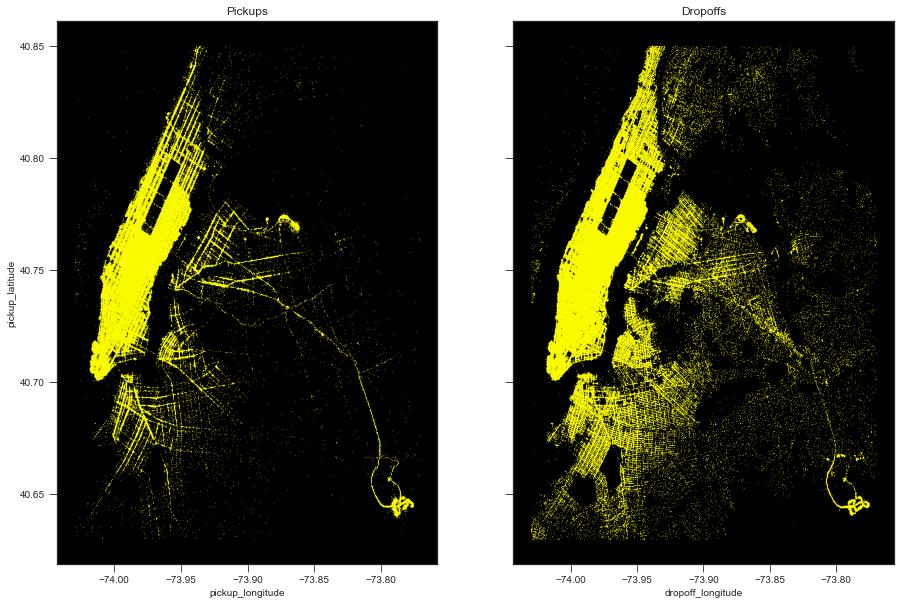

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02,alpha=.6,subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 
'''There are more Drop offs to Brooklyn and Queens as compared to its pickup '''

# FOLIUM- Interactive Maps

In [39]:
import folium
from folium.plugins import MarkerCluster

In [40]:
def Loc_Name(x):
    a=rg.search(x)
    for i in a:
        values=i.values()
        Location_Name=(list(values)[2])
    return Location_Name

In [41]:
                    '''Markers and showing a tooltip value '''
height=300
width=900
location=[40.770779, -74.017616]
maps=folium.Map([40.749851, -73.990723],zoom_start=12,width=width,height=height)
folium.Marker(location,popup=Loc_Name(location),icon=folium.Icon(color='red',angle=45)).add_to(maps)
maps
#The maps icon and the location that it returns is different.Don't know which one is correct????

In [42]:
map_loc=train[['pickup_latitude','pickup_longitude']].head(10)     #For simplicity only showing 10 points
#print(list(map_loc.iloc[1]))
range(len(map_loc['pickup_latitude']))

range(0, 10)

In [43]:
                    '''Showing all the 10 locations based on its Loatitude and Longitude'''

for i in range(len(map_loc['pickup_latitude'])):
    folium.Marker(location=list(map_loc.iloc[i])).add_to(maps)   #It has to be a list*****
maps

In [44]:
                    '''Creating Cluster to understand the distribution better'''
    
    
map2=folium.Map([40.749851, -73.990723],zoom_start=12)
marker_cluster = MarkerCluster().add_to(map2)
for i in range(len(map_loc['pickup_latitude'])):
    folium.Marker(list(map_loc.iloc[i])).add_to(marker_cluster)
map2

In [45]:
'''Importing the sklearn libraries'''

from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Feature Selection

In [46]:
                '''Dropping off Features that are not of type integer or float.And also seperating target variable'''

train.head()
features=train.drop(labels=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','DayName','trip_duration'],axis=1)
target=train['trip_duration']

In [47]:
features.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Hour,Month,Day,Distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,17,3,0,0.931432
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,6,1.122245
2,2,1,-73.979027,40.763939,-74.005333,40.710087,11,1,1,3.968772
3,2,1,-74.010040,40.719971,-74.012268,40.706718,19,4,2,0.923338
4,2,1,-73.973053,40.793209,-73.972923,40.782520,13,3,5,0.738788


In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.4,random_state=42)

In [49]:
                    '''Linear Regression'''
lm=LinearRegression()
lm.fit(X_train,Y_train)
pred=lm.predict(X_test)
accuracy=lm.score(X_train,Y_train)
print('The accuracy of the Linear Model is : ' + str((accuracy*100)))


The accuracy of the Linear Model is : 61.969750360759555


In [50]:
                    '''Random Forest'''
rf_model = RandomForestRegressor(n_estimators=50, min_samples_leaf=50, min_samples_split=75)
rf_model.fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
rf_accuracy=rf_model.score(X_train,Y_train)
print('The accuracy of the Random Forest  is : ' + str((rf_accuracy*100)))

The accuracy of the Random Forest  is : 80.95939709369208


In [51]:
print('Linear Model RMSE score = ' + str(np.sqrt(mean_squared_error(Y_test,pred))))
print('Random Forest Model RMSE score = ' + str(np.sqrt(mean_squared_error(Y_test,rf_pred))))

Linear Model RMSE score = 394.3223303488242
Random Forest Model RMSE score = 292.7956218383821


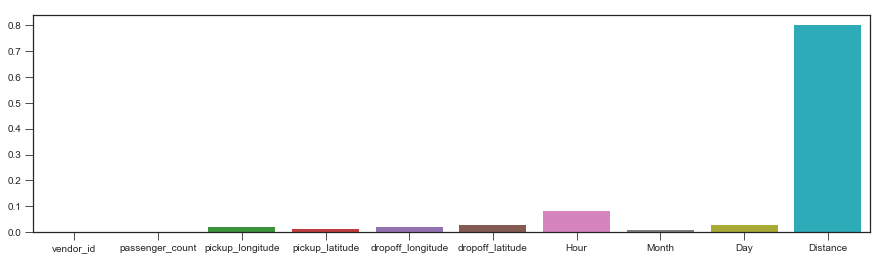

In [52]:
plt.figure(figsize=(15,4))
sns.barplot(y=rf_model.feature_importances_,x=features.columns)

*****Check the accuracy of the model before cleaning all the outliers.It was only 2%.*********

In [53]:
            '''Vendor Id and Passenger Count has least importance.So we will drop them.'''


features.drop(['vendor_id','passenger_count'],axis=1,inplace=True)

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.4,random_state=42)

In [55]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Hour,Month,Day,Distance
618470,-73.958931,40.814655,-73.933777,40.844131,20,4,1,2.425050
1180824,-73.991150,40.727821,-73.991302,40.747250,8,6,3,1.342811
289993,-73.943413,40.789326,-73.955498,40.769131,20,6,2,1.532396
790549,-73.947792,40.790218,-73.969887,40.784760,12,5,4,1.216211
414114,-73.999603,40.718472,-73.978119,40.753922,14,6,4,2.696124


In [56]:
                    '''Linear Regression'''
lm=LinearRegression()
lm.fit(X_train,Y_train)
pred=lm.predict(X_test)
accuracy=lm.score(X_train,Y_train)
print('The accuracy of the Linear Model is : ' + str((accuracy*100)))

The accuracy of the Linear Model is : 61.96662905841268


In [57]:
                    '''Random Forest'''
rf_model = RandomForestRegressor(n_estimators=50, min_samples_leaf=50, min_samples_split=75)
rf_model.fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
rf_accuracy=rf_model.score(X_train,Y_train)
print('The accuracy of the Random Forest Model is : ' + str((rf_accuracy*100)))

The accuracy of the Random Forest Model is : 80.95839561746891


In [58]:
print('Linear Model RMSE score = ' + str(np.sqrt(mean_squared_error(Y_test,pred))))
print('Random Forest Model RMSE score = ' + str(np.sqrt(mean_squared_error(Y_test,rf_pred))))

Linear Model RMSE score = 394.34445317838725
Random Forest Model RMSE score = 292.6952981112895
